## 2. Pandas.Series

$\color{red}{\text{Series}}$ — это упорядоченная изменяемая коллекция объектов, имеющая так называемые ассоциативные метки (индексы). 
Эту структуру можно сравнить со списком: каждому элементу ставится в соответствие индекс, однако, в отличие от списка, индексами могут быть не только порядковые номера — фактически что угодно, например названия компаний, даты, идентификаторы, наименования продуктов.
<img src='C:\Data Science\pictures\dst3-u1-md10_2_1.png' />

$\color{green}{\text{СОЗДАНИЕ SERIES}}$ 

 *Для создания объекта Series используется команда pd.Series()*.
 Способ 1 — из списка с использованием параметров функции pd.Series():

In [2]:
import pandas as pd

In [12]:
countries = pd.Series(
    index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ'],
    data = ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    name = 'countries'
)
display(countries)

UK       Англия
CA       Канада
US          США
RU       Россия
UA      Украина
BY     Беларусь
KZ    Казахстан
Name: countries, dtype: object

*Примечание*. Если оставить параметр index пустым, то метки будут присвоены автоматически в виде порядковых номеров элементов, например:

 Способ 2 — из словаря, в котором ключами являются будущие метки, а значениями — будущие значения Series, при этом использование параметра name также возможно:

In [6]:
countries = pd.Series({
    'UK': 'Англия',
    'CA': 'Канада',
    'US' : 'США',
    'RU': 'Россия',
    'UA': 'Украина',
    'BY': 'Беларусь',
    'KZ': 'Казахстан'},
    name = 'countries'
)
display(countries)

UK       Англия
CA       Канада
US          США
RU       Россия
UA      Украина
BY     Беларусь
KZ    Казахстан
Name: countries, dtype: object

$\color{green}{\text{ДОСТУП К ДАННЫМ В SERIES}}$ 

Доступ к элементам осуществляется с использованием loc или iloc.

**.loc** вызывается с квадратными скобками, в которые передаются метки. В него можно передать как один индекс, так и список, чтобы получилось несколько элементов. 

In [10]:
print(countries.loc[['US', 'RU', 'UK']])

US       США
RU    Россия
UK    Англия
Name: countries, dtype: object


*Примечание*. Обратите внимание, что в случае обращения по одному индексу возвращается строка. Если же обратиться по нескольким элементам, возвращается объект Series.

**.iloc** также вызывается с квадратными скобками и принимает на вход порядковые номера элементов Series (нумерация начинаются с 0). В него можно так же передавать как один индекс, так и диапазон чисел. 

In [11]:
print(countries.iloc[1:4])

CA    Канада
US       США
RU    Россия
Name: countries, dtype: object


*Примечание*. Важно, что в последнем примере конечное значение диапазона не включается в результат (берутся элементы с порядковыми номерами от 1 до 4, не включая последний).

На самом деле loc и iloc можно опустить и обращаться к элементам Series напрямую по индексам, например countries[‘UK’, 'US', ‘UA’] или countries[0, 2, 4].

## 3. Pandas.DataFrame

$\color{green}{\text{DATAFRAME КАК СТРУКТУРА ДАННЫХ}}$ 

DataFrame является двумерной структурой и представляется в виде таблицы, в которой есть строки и столбцы: столбцами в DataFrame выступают объекты Series, а строки формируются из их элементов. Также в DataFrame есть метки (индексы), которые соответствуют каждой строке таблицы.


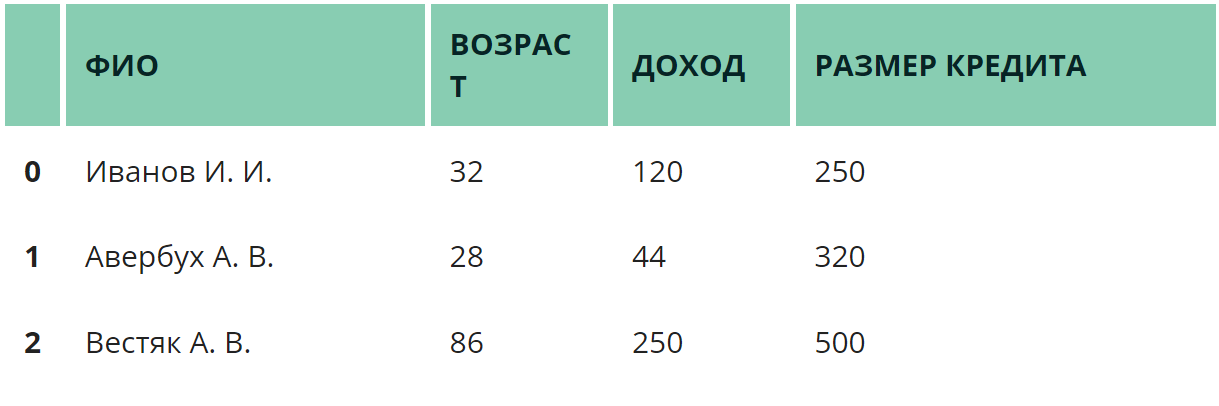

$\color{green}{\text{СОЗДАНИЕ DATAFRAME}}$

DataFrame создаётся с помощью функции **pd.DataFrame()**. Так же, как и для Series, для создания объектов DataFrame есть несколько способов:
**СПОСОБ 1**
Самый простой способ создания DataFrame — из словаря, ключами которого являются имена столбцов будущей таблицы, а значениями — списки, в которых хранится содержимое этих столбцов:

In [5]:
countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'square': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})
display(countries_df)

,country,population,square
0,Англия,56.29,133396
1,Канада,38.05,9984670
2,США,322.28,9826630
3,Россия,146.24,17125191
4,Украина,45.50,603628
5,Беларусь,9.50,207600
6,Казахстан,17.04,2724902


Обратите внимание, что, так как мы не задали метки (индексы) DataFrame, они были сгенерированы автоматически. Исправим это, задав индексы вручную:

In [6]:
countries_df.index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
display(countries_df)

,country,population,square
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,146.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.04,2724902


**СПОСОБ 2**
Также DataFrame можно создать из вложенного списка, внутренние списки которого будут являться строками новой таблицы:

In [7]:
countries_df = pd.DataFrame(
    data = [
        ['Англия', 56.29, 133396],
        ['Канада', 38.05, 9984670],
        ['США', 322.28, 9826630],
        ['Россия', 146.24, 17125191],
        ['Украина', 45.5, 603628],
        ['Беларусь', 9.5, 207600],
        ['Казахстан', 17.04, 2724902]
    ],
    columns= ['country', 'population', 'square'],
    index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
)
display(countries_df)

,country,population,square
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,146.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.04,2724902


$\color{green}{\text{AXIS В DATAFRAME}}$ 

При работе с Pandas важно уметь указывать направление работы метода, который используется. Для этого вводится понятие axis (ось, координата). Движение по строкам в таблице обозначается axis с индексом 0, а движение по столбцам — axis с индексом 1.

*Данный параметр заложен во все методы, которые могут работать в двух направлениях и по умолчанию в большинстве из них axis=0, то есть они выполняют операции со строками, если не задавать axis вручную.*

Схема ниже демонстрирует направления axis в DataFrame:

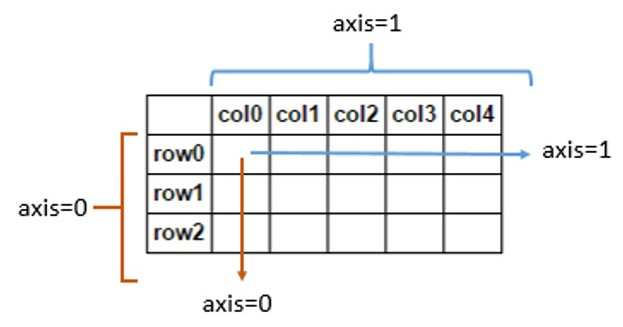

Считаем **среднее по строкам (axis = 0)** в каждом столбце:

In [8]:
countries_df.mean(axis=0)

C:\Users\User\AppData\Local\Temp\ipykernel_2556\1904880919.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  countries_df.mean(axis=0)


population    9.070000e+01
square        5.800860e+06
dtype: float64

Считаем **среднее по столбцам (axis = 1)** в каждой строке:

In [9]:
countries_df.mean(axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_2556\555943002.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  countries_df.mean(axis=1)


UK      66726.145
CA    4992354.025
US    4913476.140
RU    8562668.620
UA     301836.750
BY     103804.750
KZ    1362459.520
dtype: float64

*Здесь среднее было рассчитано по числовым столбцам для каждой строки в таблице.*

$\color{green}{\text{ДОСТУП К ДАННЫМ В DATAFRAME}}$ 

Можно обратиться к DataFrame по имени столбца через точку:

In [10]:
countries_df.population

UK     56.29
CA     38.05
US    322.28
RU    146.24
UA     45.50
BY      9.50
KZ     17.04
Name: population, dtype: float64

Другой вариант — обратиться к DataFrame по индексу и указать имя столбца:

In [11]:
countries_df['population']

UK     56.29
CA     38.05
US    322.28
RU    146.24
UA     45.50
BY      9.50
KZ     17.04
Name: population, dtype: float64

**Примечание**. Обратите внимание, что, как и ожидалось, при обращении к столбцу DataFrame мы получаем объект Series с именем, соответствующим имени столбца. Удостовериться в этом можно с помощью функции type():

In [13]:
type(countries_df.population)

pandas.core.series.Series

чтобы получить доступ к ячейкам таблицы, используются уже знакомые нам loc и iloc.

При этом, в соответствии с механизмом работы axis, при обращении к DataFrame по индексам с помощью loc (iloc) первым индексом указывается индекс (порядковый номер), соответствующий строкам, а вторым — имя (порядковый номер) столбца.

1. Получим площадь Великобритании:

In [14]:
countries_df.loc['UK', 'square']

133396

2. Получим население и площадь, соответствующие России:

In [15]:
countries_df.loc['RU', ['population', 'square']]

population      146.24
square        17125191
Name: RU, dtype: object

3. Сделаем вырезку из таблицы и получим информацию о населении и площади, соответствующую Украине, Беларуси и Казахстану:

In [16]:
countries_df.loc[['UA', 'BY', 'KZ'],['population', 'square']]
#или
#countries_df.iloc[4:8, 1:3]

,population,square
UA,45.50,603628
BY,9.50,207600
KZ,17.04,2724902


## 4. Работа с различными источниками данных в Pandas

$\color{green}{\text{ЗАПИСЬ В CSV-ФАЙЛ}}$ 

Предположим, что мы захотели сохранить созданный нами ранее DataFrame. Самым простым и распространённым источником табличных данных является формат csv (comma-separated values).

Экспорт данных в формат csv осуществляется с помощью метода **DataFrame to_csv()**:<br><br>
*path_or_buf* — путь до файла, в который будет записан DataFrame (например, data/my_data.csv);<br>
*sep* — разделитель данных в выходном файле (по умолчанию ',');<br>
*decimal* — разделитель чисел на целую и дробную части в выходном файле (по умолчанию '.')<br>
*columns* — список столбцов, которые нужно записать в файл (по умолчанию записываются все столбцы)<br>
*index* — параметр, определяющий, требуется ли создавать дополнительный столбец с индексами строк в файле (по умолчанию True).

In [18]:
countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'square': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})
countries_df.to_csv('data/countries.csv', index=False, sep=';')

$\color{green}{\text{ЧТЕНИЕ CSV-ФАЙЛА}}$ 

Для чтения таблицы из csv-файла используется функция модуля Pandas read_csv. Функция возвращает DataFrame и имеет несколько важных параметров:<br><br>
*filepath_or_buffer* — путь до файла, который мы читаем; <br>
*sep* — разделитель данных (по умолчанию ','); <br>
*decimal* — разделитель чисел на целую и дробную часть в выходном файле (по умолчанию '.');<br>
*names* — список с названиями столбцов для чтения;<br>
*skiprows* — количество строк в файле, которые нужно пропустить (например, файл может содержать служебную информацию, которая нам не нужна).

Убедимся, что сохранённый нами ранее файл создался верно. Для этого прочитаем его в переменную countries_data и выведем её на экран. Не забудем также о том, что мы использовали в качестве разделителя ';':

In [28]:
countries_data = pd.read_csv('data/countries.csv', sep=';')
display(countries_data)

,country,population,square
0,Англия,56.29,133396
1,Канада,38.05,9984670
2,США,322.28,9826630
3,Россия,146.24,17125191
4,Украина,45.50,603628
5,Беларусь,9.50,207600
6,Казахстан,17.04,2724902


$\color{green}{\text{ЧТЕНИЕ CSV-ФАЙЛА ПО ССЫЛКЕ}}$ 

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv')
display(data)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


$\color{green}{\text{ЗАПИСЬ И ЧТЕНИЕ В ДРУГИХ ФОРМАТАХ}}$ 

**Методы для записи таблиц в файлы отличных от csv форматов:**<br><br>
to_excel() — запись DataFrame в формат Excel-таблицы (.xlsx);<br>
to_json() — запись DataFrame в формат JSON (.json);<br>
to_xml() — запись DataFrame в формат XML-документа (.xml);<br>
to_sql() — запись DataFrame в базу данных SQL (для реализации этого метода необходимо установить соединение с базой данных).<br>
**Методы для чтения таблиц из файлов в отличных от csv форматах:**<br><br>
read_excel() — чтение из формата Excel-таблицы (.xlsx) в DataFrame;<br>
read_json() — чтение из формата JSON (.json) в DataFrame;<br>
read_xml() — чтение из формата XML-документа (.xml) в DataFrame;<br>
read_sql() — чтение из базы данных SQL в DataFrame (также необходимо установить соединение с базой данных).

## 5. Знакомимся с данными: недвижимость

Данные, с которыми мы будем работать — это обработанный датасет об объектах недвижимости в Мельбурне (Австралия) и его пригородах.<br>
[www.kaggle.com](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot)

Данные представляют собой таблицу, в которой содержится 23 столбца:<br><br>

index — номер строки<br>
Suburb — наименование пригорода<br>
Address — адрес<br>
Rooms — количество комнат в помещении<br>
Type — тип здания (h — дом, коттедж, вилла, терраса; u — блочный, дуплексный дом; t — таунхаус)<br>
Price — цена помещения<br>
Method — метод продажи <br>
SellerG — риэлторская компания<br>
Date — дата продажи (в формате день/месяц/год)<br>
Distance — расстояния до объекта от центра Мельбурна <br>
Postcode — почтовый индекс<br>
Bedroom — количество спален<br>
Bathroom — количество ванных комнат<br>
Car — количество парковочных мест<br>
Landsize — площадь прилегающей территории<br>
BuildingArea — площадь здания<br>
YearBuilt — год постройки<br>
CouncilArea — региональное управление<br>
Lattitude — географическая широта<br>
Longitude — географическая долгота<br>
Regionname — наименование района Мельбурна<br>
Propertycount — количество объектов недвижимости в районе<br>
Coordinates — широта и долгота, объединённые в кортеж<br>

## 6. Исследование структуры DataFrame


$\color{green}{\text{ВЫВОД ПЕРВЫХ И ПОСЛЕДНИХ СТРОК}}$ 

В большинстве случаев для того, чтобы понять структуру DataFrame и удостовериться, что таблица подгрузилась верно, достаточно вывести несколько первых или последних строк.<br>
Для этого у DataFrame есть методы **head()** и **tail()**, которые возвращают n первых и n последних строк таблицы соответственно (по умолчанию n = 5).<br>
Выведем первые пять строк нашей таблицы:

In [1]:
import pandas as pd

melb_data = pd.read_csv("C:\Курс DS-3.0\IDE\Python_10\data\melb_data.csv", sep=",")
display(melb_data.head())

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,"-37.7996, 144.9984"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,"-37.8079, 144.9934"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,"-37.8093, 144.9944"
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,1.0,94.0,126.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,"-37.7969, 144.9969"
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,"-37.8072, 144.9941"


Следующий код выведет семь последних строк нашей таблицы:<br>
melb_data.tail(7)

$\color{green}{\text{РАЗМЕРНОСТЬ ТАБЛИЦЫ}}$ 

Далее хотелось бы узнать размер таблицы — количество строк и количество столбцов. Это можно сделать с помощью атрибута **shape**, который возвращает кортеж с количеством строк и столбцов:

In [26]:
melb_data.shape #Таким образом, в наших данных содержится информация о 13 580 объектах недвижимости, и их описывают 23 признака.

(13580, 23)

$\color{green}{\text{ПОЛУЧЕНИЕ ИНФОРМАЦИИ О СТОЛБЦАХ}}$ 

Для того чтобы получить более детальную информацию о столбцах таблицы, можно использовать метод DataFrame **info()**<br>
Данный метод выводит:<br>

-информацию об индексах;<br>
-информацию об общем количестве столбцов;<br>
-таблицу, в которой содержится информация об именах столбцов (Column), количестве непустых значений (Non-Null Count) в каждом столбце и типе данных столбца (Dtype), количестве столбцов, в которых используется определённый тип данных;<br>
-количество оперативной памяти в мегабайтах, которое тратится на хранение данных:

In [8]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          13580 non-null  int64  
 1   Suburb         13580 non-null  object 
 2   Address        13580 non-null  object 
 3   Rooms          13580 non-null  int64  
 4   Type           13580 non-null  object 
 5   Price          13580 non-null  float64
 6   Method         13580 non-null  object 
 7   SellerG        13580 non-null  object 
 8   Date           13580 non-null  object 
 9   Distance       13580 non-null  float64
 10  Postcode       13580 non-null  int64  
 11  Bedroom        13580 non-null  float64
 12  Bathroom       13580 non-null  float64
 13  Car            13580 non-null  float64
 14  Landsize       13580 non-null  float64
 15  BuildingArea   13580 non-null  float64
 16  YearBuilt      13580 non-null  float64
 17  CouncilArea    12211 non-null  object 
 18  Lattit

Из вывода метода info() становится понятно, что в нашей таблице есть столбец CouncilArea с пропущенными значениями — количество непустых значений в столбце меньше, чем количество строк в таблице (12211 < 13580).<br>

**Пустыми, или пропущенными**, значениями называются значения в ячейках таблицы, которые не заполнены по какой-либо причине, то есть на их месте стоит пустое место. В Pandas такие значения обозначаются символом **NaN** (Not-a-Number).

$\color{green}{\text{ИЗМЕНЕНИЕ ТИПА ДАННЫХ В СТОЛБЦЕ}}$ 

Если присмотреться внимательнее к выводу метода info(), а конкретнее — к типам данных столбцов, становится понятно, что некоторые признаки кодируются не совсем корректными типами данных. 
Чтобы исправить это, можно воспользоваться методом **astype()**, который позволяет преобразовать тип данных столбца:

In [ ]:
melb_data['Car'] = melb_data['Car'].astype('int64')
melb_data['Bedroom'] = melb_data['Bedroom'].astype('int64')

**Примечание**. При работе с очень большими объёмами данных такая перекодировка может сыграть большую роль, позволяя сэкономить объём занимаемой таблицей памяти.

$\color{green}{\text{ПОЛУЧЕНИЕ ОПИСАТЕЛЬНОЙ СТАТИСТИКИ}}$ 

Часто при работе с таблицей нужно быстро посмотреть на основные статистические свойства её столбцов. Для этого можно воспользоваться методом DataFrame **describe()**.<br>
По умолчанию метод работает с числовыми (int64 и float64) столбцами и показывает число непустых значений (count), среднее (mean), стандартное отклонение (std), минимальное значение (min),  квантили уровней 0.25, 0.5 (медиана) и 0.75 (25%, 50%, 75%) и максимальное значение (max) для каждого столбца исходной таблицы.<br>
[квантили](https://rus.toptipfinance.com/quartile)<br>
[стандартное отклонение](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5)

выведем на экран значение статистических параметров только для столбцов Distance (расстояние от объекта недвижимости до центра Мельбурна), BuildingArea (площадь здания) и Price (цена объекта):

In [4]:
melb_data.describe().loc[:, ["Distance", "BuildingArea", "Price"]]

,Distance,BuildingArea,Price
count,13580.000000,13580.000000,1.358000e+04
mean,10.137776,139.633972,1.075684e+06
std,5.868725,392.217403,6.393107e+05
min,0.000000,0.000000,8.500000e+04
25%,6.100000,122.000000,6.500000e+05
50%,9.200000,126.000000,9.030000e+05
75%,13.000000,129.940000,1.330000e+06
max,48.100000,44515.000000,9.000000e+06


метод **describe()** можно применять не только к числовым признакам. С помощью параметра **include** можно указать тип данных, для которого нужно вывести описательную информацию.
Например, для типа данных **object** метод describe() возвращает DataFrame, в котором указаны:<br>

количество непустых строк (count);<br>
количество уникальных значений (unique);<br>
самое частое значение — мода —  (top);<br>
частота — объём использования — этого значения (freq) для каждого столбца типа object исходной таблицы.

In [5]:
melb_data.describe(include ="object")

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname,Coordinates
count,13580,13580,13580,13580,13580,13580,12211,13580,13580
unique,314,13378,3,5,268,58,33,8,13097
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan,"-37.8361, 144.9966"
freq,359,3,9449,9022,1565,473,1163,4695,12


**Столбец Suburb** (пригород)
Наибольшее количество проданных объектов (359) находилось в пригороде Reservoir.<br>
**Столбец Type** (тип здания)
Самый популярный тип дома — h (дом, вилла, коттедж).<br>
**Столбец SellerG** (риелтор)
В наших данных нам известно о 268 различных риэлторских компаниях, однако самой главной «акулой» в этом бизнесе является компания Nelson — они продали 1 565 различных домов.<br>
**Столбец Date** (дата продажи)
В нашей таблице содержится информация за 58 дней, при этом наибольшее число продаж (473) пришлось на 27 мая 2017 года.

$\color{green}{\text{ПОЛУЧЕНИЕ ЧАСТОТЫ УНИКАЛЬНЫХ ЗНАЧЕНИЙ В СТОЛБЦЕ}}$

чтобы определить, сколько раз в столбце повторяется каждый из вариантов значений (т.е. найти частоту для каждого уникального знания), используется метод **value_counts()**.

In [6]:
melb_data["Regionname"].value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

Чтобы сделать вывод более интерпретируемым и понятным, можно воспользоваться параметром **normalize**. При установке значения этого параметра на True результат будет представляться в виде доли (относительной частоты):

In [7]:
melb_data["Regionname"].value_counts(normalize = True)

Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217084
Eastern Metropolitan          0.108321
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.003903
Northern Victoria             0.003019
Western Victoria              0.002356
Name: Regionname, dtype: float64

Из результатов мы можем сделать вывод, что наименьшее количество объектов (менее 1%) было продано в районах Victoria, а наибольшее — в районах Metropolitan.

## 7. Статистические методы

$\color{green}{\text{АГРЕГИРУЮЩИЕ МЕТОДЫ}}$ 

**Агрегирующим** в Pandas называется метод, который для каждого столбца возвращает только одно значение — показатель (например, вычисление медианы, максимума, среднего и так далее).

МЕТОД | СТАТИСТИЧЕСКИЙ ПАРАМЕТР<br>
**.count()** |	Количество непустых значений<br>
**.mean()** |	Среднее значение<br>
**.min()**	| Минимальное значение<br>
**.max()** |	Максимальное значение<br>
**.deviance()** |	Дисперсия<br>
**.std()** |	Стандартное отклонение<br>
**.sum()** |	Сумма<br>
**.quantile(x)** |	Квантиль уровня x<br>
**.nunique()** |	Число уникальных значений<br>

Если один из этих методов применить ко всему DataFrame, то в результате его работы будет получен объект типа Series, в котором в качестве индексов будут выступать наименования столбцов, а в качестве значений — статистический показатель. В случае применения метода к отдельному столбцу результатом вычислений станет число.<br>
В каждый метод можно передать некоторые параметры, среди которых:<br>
**axis**  — определяет, подсчитывать параметр по строкам или по столбцам;<br>
**numeric_only** — определяет, вычислять параметры только по числовым столбцам/строкам или нет (True/False).


In [2]:
#Вычислим среднюю цену на объекты недвижимости:
print(melb_data['Price'].mean())

1075684.079455081


In [3]:
#Найдём максимальное количество парковочных мест:
print(melb_data["Car"].max())

10.0


In [4]:
#представим, что риэлторская ставка для всех компаний за продажу недвижимости составляет 12%. 
#Найдём общую прибыльность риэлторского бизнеса в Мельбурне. Результат округлим до сотых:
rate = 0.12
income = melb_data['Price'].sum() * rate
print('Total income of real estate agencies:', round(income, 2))

Total income of real estate agencies: 1752934775.88


In [7]:
#Найдём, насколько медианная площадь территории отличается от её среднего значения. 
#Вычислим модуль разницы между медианой и средним и разделим результат на среднее, 
#чтобы получить отклонение в долях:
landsize_median = melb_data['Landsize'].median() 
landsize_mean =  melb_data['Landsize'].mean()
print((abs(landsize_median-landsize_mean)/landsize_mean)*100)

21.205713983546193


В результате получаем долю отклонения медианы от среднего значения. Умножив результат на 100, получим его в процентах. Отклонение медианы от среднего значения на 21% является довольно большим, и это повод задуматься над тем, чтобы исследовать признак на наличие аномалий. 

$\color{green}{\text{МОДАЛЬНОЕ ЗНАЧЕНИЕ}}$ 

статический показатель моды — самого распространённого значения в столбце. Он вычисляется с помощью метода **mode()**.<br>

Модальных значений может быть несколько, то есть несколько значений могут встречаться одинаковое количество раз. Поэтому метод **mode()**, в отличие от агрегирующих методов, возвращает не одно число, а серию.

In [8]:
#Вычислим, какое число комнат чаще всего представлено на рынке недвижимости:
print(melb_data["Rooms"].mode())

0    3
Name: Rooms, dtype: int64


*Примечание*. Метод **mode()** может быть использован не только с числовыми столбцами, но и со столбцами типа object.

In [9]:
# например, с помощью следующего кода можно найти наиболее распространённое название района:
melb_data['Regionname'].mode()

0    Southern Metropolitan
Name: Regionname, dtype: object

## 8. Фильтрация данных в DataFrame

Под **фильтрацией** в DataFrame подразумевается получение новой таблицы путём вырезания строк, не удовлетворяющих поставленному условию. <br>

Разберём классический способ фильтрации в DataFrame — фильтрацию с помощью масок.<br>

**Маской** называется Series, которая состоит из булевых значений, при этом значения *True* соответствуют тем индексам, для которых заданное условие выполняется, в противном случае ставится значение *False* (например, цена > 2 млн).<br>

In [10]:
#Создадим маску и положим её в переменную с именем mask.
mask = melb_data['Price'] > 2000000
display(mask)

0        False
1        False
2        False
3        False
4        False
         ...  
13575    False
13576    False
13577    False
13578     True
13579    False
Name: Price, Length: 13580, dtype: bool

Для фильтрации нужно просто подставить переменную **mask** в индексацию DataFrame. Маска показывает, какие строки нужно оставлять в результирующем наборе, а какие — убирать

In [12]:
#выведем первые пять строк отфильтрованной таблицы
display(melb_data[mask].head())

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
80,80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,4/03/2017,3.3,...,0.0,211.0,198.0,1890.0,Port Phillip,-37.8481,144.9499,Southern Metropolitan,3280.0,"-37.8481, 144.9499"
85,85,Albert Park,104 Richardson St,4,h,2300000.0,S,Marshall,7/05/2016,3.3,...,1.0,153.0,180.0,1880.0,Port Phillip,-37.8447,144.9523,Southern Metropolitan,3280.0,"-37.8447, 144.9523"
88,88,Albert Park,29 Faussett St,2,h,2120000.0,S,Greg,10/09/2016,3.3,...,1.0,199.0,107.0,1900.0,Port Phillip,-37.8422,144.9554,Southern Metropolitan,3280.0,"-37.8422, 144.9554"
92,92,Albert Park,2 Dundas Pl,3,h,2615000.0,S,Cayzer,10/12/2016,3.3,...,1.0,177.0,181.0,1880.0,Port Phillip,-37.8415,144.9585,Southern Metropolitan,3280.0,"-37.8415, 144.9585"
93,93,Albert Park,23 Finlay St,5,h,2100000.0,S,Greg,10/12/2016,3.3,...,1.0,237.0,126.0,1970.0,Port Phillip,-37.8436,144.9557,Southern Metropolitan,3280.0,"-37.8436, 144.9557"


*Примечание*. В результате выполнения фильтрации возвращается новый DataFrame, полученный из исходного, при этом исходная таблица melb_data остаётся без изменений.

In [ ]:
# не обязательно заносить маску в отдельную переменную — можно сразу вставлять условие в операцию 
#индексации DataFrame, например:
melb_data[melb_data['Price'] > 2000000]

In [14]:
#Найдём количество зданий с тремя комнатами. Для этого отфильтруем таблицу по условию: 
#обратимся к результирующей таблице по столбцу Rooms и найдём число строк в ней с помощью 
#атрибута shape:
melb_data[melb_data["Rooms"]== 3].shape[0]

5881

Условия можно комбинировать, используя операторы **&** (логическое И) и **|** (логическое ИЛИ). Условия при этом заключаются в скобки.

In [16]:
#Усложним прошлый пример и найдём число трёхкомнатных домов с ценой менее 300 тысяч:
melb_data[(melb_data["Rooms"]==3) & (melb_data["Price"] < 300000)].shape[0]

3

In [18]:
#Немного «ослабим» условие: теперь нас будут интересовать дома с ценой менее 300 тысяч,
# у которых либо число комнат равно 3 либо площадь домов более 100 квадратных метров:
melb_data[(melb_data["Price"]<300000) & ((melb_data["Rooms"]==3)| (melb_data["BuildingArea"]>100))].shape[0]

68

*Примечание*. Обратите внимание, что использование привычных операторов *and* и *or* будет неверным и приведёт к ошибке, так как они выполняют логические операции между двумя булевыми числами. В нашем случае слева и справа от оператора стоят маски (объекты Series), для которых логическую операцию надо совершить поэлементно, а операторы and и or для такого не предназначены.

In [19]:
# Фильтрацию часто сочетают со статистическими методами. Найдём максимальное количество комнат в 
# таунхаусах. Так как в результате фильтрации получается DataFrame, то обратимся к нему по столбцу
# Rooms и найдём максимальное значение:
melb_data[melb_data["Type"]=="t"]["Rooms"].max()

5

In [21]:
# Найдём медианную площадь здания у объектов, чья цена выше средней. Для того чтобы оградить
#наш код от нагромождений, предварительно создадим переменную со средней ценой:
mean_price = melb_data["Price"].mean()
melb_data[melb_data["Price"] > mean_price]["BuildingArea"].median()

126.0

Фильтрация находит применение в очистке данных.<br>

Под **очисткой данных** понимается удаление из данных аномальных значений (выбросов), пропусков и данных, которые не несут информацию.<br>

Причин появления таких дефектов в данных множество: неправильная передача по сети, неверная выгрузка из базы, человеческий фактор и т. д.